**Assignment** **1-Neural Networks**

**Classification of Movie Reviews: A binary Classification Problem.**

**Problem Statement:**
Using Neural Networks, classify a movie review as favorable or negative.

In [1]:
# Importing the IMDB Dataset.
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)
train_data[0]
train_labels[0]
max([max(sequence) for sequence in train_data])

9999

In [2]:
# Decoding reviews back to text.
# Load the dictionary mappings from the word to the integer index.
word_index = imdb.get_word_index()
# Word index to integer mapping in reverse.
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
# Decode the review, mapping integer to words.
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

**Preparing the data:**
Using multi-hot encoding, the lists are turned into vectors of 0s and 1s. Each review is represented by a 10000-dimensional vector with dimension set to 10000.




In [3]:
# The integer sequences are encoded using multi-hot encoding.
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)
x_train[0]
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

**MODEL BUILDING**

**Model's Architecture** 

1. We are using the Keras library for this classification assignment.
2. The first two hidden layers each include 16 nodes with an activation function of **ReLU** (the activation function is changed to **tanh** to explore how different activation functions impact the validity and test set accuracy).
3. The third layer is the output layer, which uses a sigmoid function.














In [4]:
from tensorflow import keras
from tensorflow.keras.layers  import Dropout
from keras import layers
model = keras.Sequential([
    layers.Dense(64, activation="tanh"),
Dropout(0.5),
    layers.Dense(32, activation="tanh"),
  Dropout(0.5),
     layers.Dense(32, activation="tanh"),
     layers.Dense(1, activation="sigmoid")
])

**Model Compiling**

The model is compiled using the following functions:
1. The rmsprop optimizer is employed.
2. Because this is a binary classification issue, the loss function is binary crossentropy.
3. Accuracy is the performance metric.






In [5]:
model.compile(optimizer="rmsprop",
              loss="mse",
              metrics=["accuracy"])


**Partitioning the data into Training and Validation set.**

A subset of the data is being held back to validate the model's performance. Validation is used to fine-tune the hyperparameters and determine the optimal value. In most cases, we adjust the hyperparameter value in the training set before testing the model on the validation set. This hyperparameter change is performed until the best possible accuracy is obtained. (In our circumstance, we are judging the model's performance by Accuracy).



In [6]:
x_validation  = x_train[:10000]
partial_x_train = x_train[10000:]
y_validation = y_train[:10000]
partial_y_train = y_train[10000:]

**Training the Model**

I start by training the model in 20-epoch batches with 512 samples. Following that, the number of epochs is adjusted based on the loss function and accuracy.

In [7]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_validation, y_validation))


Epoch 1/20
30/30 [==============================] - 4s 100ms/step - loss: 0.1765 - accuracy: 0.7405 - val_loss: 0.1069 - val_accuracy: 0.8553
Epoch 2/20
30/30 [==============================] - 3s 97ms/step - loss: 0.0994 - accuracy: 0.8703 - val_loss: 0.0887 - val_accuracy: 0.8787
Epoch 3/20
30/30 [==============================] - 2s 77ms/step - loss: 0.0753 - accuracy: 0.9017 - val_loss: 0.1021 - val_accuracy: 0.8597
Epoch 4/20
30/30 [==============================] - 2s 67ms/step - loss: 0.0663 - accuracy: 0.9143 - val_loss: 0.1027 - val_accuracy: 0.8654
Epoch 5/20
30/30 [==============================] - 2s 67ms/step - loss: 0.0604 - accuracy: 0.9217 - val_loss: 0.0878 - val_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 2s 68ms/step - loss: 0.0536 - accuracy: 0.9326 - val_loss: 0.0944 - val_accuracy: 0.8803
Epoch 7/20
30/30 [==============================] - 2s 67ms/step - loss: 0.0493 - accuracy: 0.9381 - val_loss: 0.0935 - val_accuracy: 0.8815
Epoch 8/20
3

In [8]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

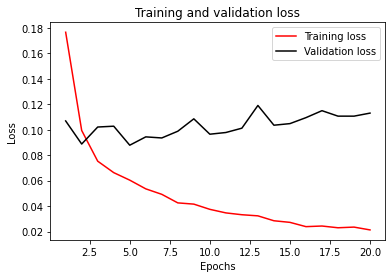

In [9]:
#Plotting the Validation loss.
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "red", label="Training loss")
plt.plot(epochs, val_loss_values, "black", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

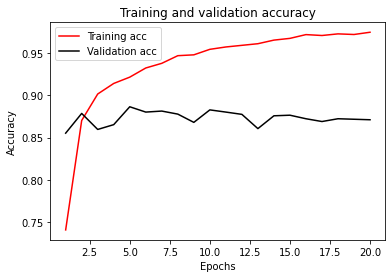

In [10]:
#Plotting the training and validation accuracy.
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "red", label="Training acc")
plt.plot(epochs, val_acc, "black", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

We can see from the charts above that the smallest validation loss and maximum accuracy are reached roughly at 2 epochs (less than 2.5 according to the plots.) After 2.5 epochs, the accuracy on the training data improves but the accuracy on the validation data decreases. This implies that after 2.5 epochs, the model is overfitted.
To reduce model overfitting, 2 epochs are chosen as the ideal number of epochs.From the above plots,

We can observe that the minimum validation loss and maximum accuracy is obtained nearly at 2 epochs(less than 2.5 according to the plots.)
After 2.5 epochs, the accuracy on the training data is improving whereas the accuracy on the Validation data is decreasing. This means that after 2.5 epochs, model is overfitted.


To decrease model's overfitting, 2 epochs is chosen as optimal number of epochs.

In [11]:
#Training the model
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=2,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))

Epoch 1/2
30/30 [==============================] - 2s 81ms/step - loss: 0.0203 - accuracy: 0.9763 - val_loss: 0.1111 - val_accuracy: 0.8740
Epoch 2/2
30/30 [==============================] - 2s 64ms/step - loss: 0.0185 - accuracy: 0.9785 - val_loss: 0.1129 - val_accuracy: 0.8715


The accuracy of the model on Validation set is 87.40 and 87.15 on each epoch respectively.

In [12]:
#Testing on test data
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="tanh"),
        layers.Dense(16, activation="tanh"),

    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/2
49/49 [==============================] - 4s 36ms/step - loss: 0.1503 - accuracy: 0.8150
Epoch 2/2
782/782 [==============================] - 2s 3ms/step - loss: 0.0848 - accuracy: 0.8848


[0.08481311798095703, 0.8848000168800354]

The accuracy is 88.48 after installing the model on the Test data (unseen data).

**Dropout technique**

The Dropout method is being utilized to improve the accuracy of the model on Validation and Test data.

This method has one dropout layer with a dropout value of 10%. This dropout percentage amount will randomly remove 10% of the nodes between the layers, ensuring that the model captures just the key properties and ignores noise (if any).

After experimenting with various node counts (16,32,64,128 and so on), the number of nodes in each layer is fixed at 20 since the accuracy is greater at 20 nodes. Similarly, I examined the performance of the model with fewer and more nodes (the results are presented in the summary sheet/reports).

For improved model performance, I employed both ReLU and tanh activation functions.

In [13]:
#Dropouts
from keras import regularizers
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras import models
dpt_model = models.Sequential()
dpt_model.add(layers.Dense(20, activation='relu', input_shape=(10000,)))
dpt_model.add(layers.Dropout(0.1))
dpt_model.add(layers.Dense(20, activation='tanh', input_shape=(10000,)))
dpt_model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
#Re-training the model on 2 epochs after implementing Dropout technique:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=2,
                    batch_size=512,
                    validation_data=(x_validation, y_validation))

Epoch 1/2
30/30 [==============================] - 2s 58ms/step - loss: 0.0419 - accuracy: 0.9519 - val_loss: 0.0434 - val_accuracy: 0.9475
Epoch 2/2
30/30 [==============================] - 1s 39ms/step - loss: 0.0289 - accuracy: 0.9707 - val_loss: 0.0497 - val_accuracy: 0.9372


The validation accuracy improves significantly after employing the Dropout approach, which is 94.75 and 93.72 on each epoch. This is a 6% improvement after employing the Dropout approach.

In [15]:
# Retesting the model
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="tanh"),
        layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=2, batch_size=512)
results = model.evaluate(x_test, y_test)
results

Epoch 1/2
49/49 [==============================] - 3s 29ms/step - loss: 0.4503 - accuracy: 0.8195
Epoch 2/2
782/782 [==============================] - 2s 3ms/step - loss: 0.2870 - accuracy: 0.8829


[0.28701096773147583, 0.8829200267791748]

We can observe that employing the Dropout approach reduces the accuracy to 88.29 from 88.48.

**Process**

**Input data directly proportional to accuracy**

1. Based on current model performance, validation accuracy appears to have achieved a plateau after a few epochs. In addition to regularization procedures, we can try varying the number of input units to see how it affects the model's learning capacity.

2. The first hidden layer in the current model has 16 units. We increased the hidden layer units to 32 and 64 to examine how it influenced the validation accuracy.

3. In this scenario, increasing the number of input units from 16 to 32 increased the model's validation accuracy by 0.01. Nevertheless, this improvement was minimal in contrast to the increase in the number of model parameters, which increased the danger of overfitting.

1. To begin, we used a network model with two hidden layers instead of just one. The model's performance metrics (loss and accuracy) fluctuate with each epoch.

2. When compared to a model with only one hidden layer, adding another hidden layer allows the model to learn more complex data representations. This might lead to better validation set performance. In contrast, having too many hidden layers may result in overfitting, in which the model memorizes the training data too well and performs poorly on fresh data. A balance between model complexity and performance must be established.

3. According on the performance metrics, the model looks to be doing well on both the training and validation sets, with a final validation accuracy of 0.9372. Yet, there is a modest increase in validation loss at the end of training, which may indicate overfitting. To avoid overfitting, measures such as dropout or regularization may be worth investigating.

4. The accuracy has decreased as a result of changing the loss function to mse, however this is to be expected because the loss function and the accuracy metric are not directly related. The model optimizes for mean squared error rather than binary cross-entropy loss. Yet, it is a valid method that, depending on the issue and data, may outperform binary cross-entropy.

5. While utilizing the mean squared error (MSE) loss function for regression difficulties may be more suitable, it does not always improve model performance. That appears to have lowered the model's accuracy in this case.
As a result, I would stick with the binary crossentropy loss function in this case.

6. In the given code, the tanh activation function was utilized to train a neural network model for a binary classification task. Throughout the 20-epoch training period, the validation accuracy and loss were tracked for each epoch.

7. The tanh (hyperbolic tangent) function is a symmetric activation function that converts -1 to 1. Because the tanh function returns 0 at its mean, it is useful for normalizing input values.

8. Overall, the tanh activation function looks to perform very well for the present binary classification task, while more testing with different activation functions and hyperparameters may help improve performance.

9. This looks to be the outcome of a neural network model trained using the dropout method.

10. Dropout is a technique used in neural networks to reduce overfitting. During training, Dropout randomly removes (i.e., sets to zero) a portion of the neurons in the network. This prevents any one neuron from having a large impact on the model and encourages the network to develop more resilient features.

11. Looking at the training output, we can see that the model was trained for 20 epochs, and that the accuracy on the training set increased as the epochs progressed, indicating that the model improved its fit to the training data. On the other hand, the model's accuracy on the validation set remained pretty stable, showing that it was not overfitting.

12. This is most likely because the model employs dropout. Dropout keeps any one neuron from becoming very prominent in the model, reducing overfitting.

13. To recap, the output seen above is most likely the outcome of a neural network model trained using the dropout approach to avoid overfitting. Because of the use of dropout, the model performed well on the validation set while avoiding overfitting to the training data.